#### Problem 8
Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

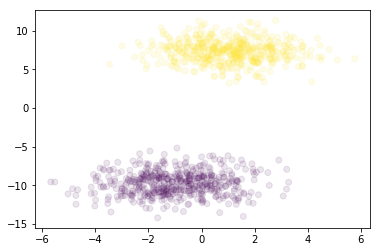

In [8]:
# Generate dataset

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

def plot_dataset(x, y):
    x0 = x[:,0]
    x1 = x[:,1]
    plt.scatter(x0, x1, c = y, alpha = 0.1)

    

blobs = datasets.make_blobs(n_samples = 1000, centers = 2, cluster_std=1.5)

plot_dataset(blobs[0], blobs[1])
plt.show()


In [9]:
# LinearSVC

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

lin_svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC(C = 1, loss = "hinge"))
])

# SVC
from sklearn.svm import SVC

svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = "linear"))
])

# SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDClassifier(loss = "log"))
])


In [10]:
x = blobs[0]
y = blobs[1]

lin_svc_clf.fit(x, y)
svc_clf.fit(x, y)
sgd_clf.fit(x, y)

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [11]:
def plot_predictions(clf, x, grid_density = 100):
    
    # Generate a grid of data to run classifier predict on, to generate data for plotting contour
    x0lim = (min(x[:,0]), max(x[:,0]))
    x0steps = np.linspace(x0lim[0], x0lim[1], num = grid_density)
    x1lim = (min(x[:,1]), max(x[:,1]))
    x1steps = np.linspace(x1lim[0], x1lim[1], num = grid_density)
    
    # Plot predicted data as a contour
    x0, x1 = np.meshgrid(x0steps, x1steps)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

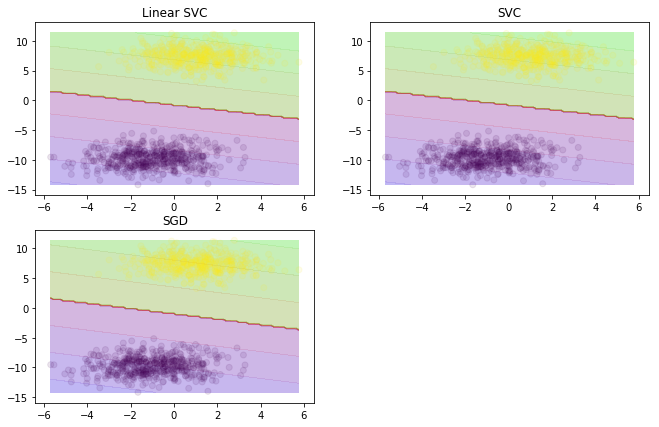

In [12]:
plt.figure(figsize=(11,7))
plt.subplot(221)
plot_predictions(lin_svc_clf, x)
plot_dataset(x, y)
plt.title("Linear SVC")

plt.subplot(222)
plot_predictions(svc_clf, x)
plot_dataset(x, y)
plt.title("SVC")

plt.subplot(223)
plot_predictions(sgd_clf, x)
plot_dataset(x, y)
plt.title("SGD")
plt.show()

#### Problem 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [1]:
# Gater data

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

x,y = mnist["data"], mnist["target"]

x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.1)

# shuffle_index = np.random.permutation(60000)
# x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]


/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
# Train multiple one-vs-all binary SVM classifiers
# Try first w/ 5 classifier
from sklearn.svm import SVC

test_num = 5

y_train_num = (y_train == test_num)
y_test_num = (y_test == test_num)

svm_test_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC())
])

svm_test_clf.fit(x_train, y_train_num)

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [27]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y_pred = cross_val_predict(svm_test_clf, x_train, y_train_num, cv = 3)

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
def classifier_metrics(y_true, y_pred):
    from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
    from sklearn.metrics import precision_score, recall_score
    print("Confusion matrix:")
    print(confusion_matrix(y_train_num, y_pred))
    print("F1: ", f1_score(y_train_num, y_pred))
    print("Precision: ", precision_score(y_train_num, y_pred))
    print("Recall: ", recall_score(y_train_num, y_pred))
    
classifier_metrics(y_train_num, y_pred)

Confusion matrix:
[[5991  343]
 [ 182  484]]
F1:  0.6483590087073007
Precision:  0.585247883917775
Recall:  0.7267267267267268


See if I can get a better F1 by using larger training sets

In [57]:
import warnings
import time

warnings.filterwarnings('ignore')

f1s = np.zeros((5,3))
for n, size in enumerate(np.linspace(0.1, 0.4, 5)):
    start = time.time()
    print("Starting ", n, " of 5")
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = size)
    y_train_num = (y_train == test_num)
    svm_test_clf.fit(x_train, y_train_num)
    y_pred = cross_val_predict(svm_test_clf, x_train, y_train_num, cv = 3)
    f1s[n, 0] = size
    f1s[n, 1] = f1_score(y_train_num, y_pred)
    f1s[n, 2] = time.time() - start
    print(time.time() - start)
    

Starting  0  of 5
12.359056949615479
Starting  1  of 5
36.65678000450134
Starting  2  of 5
68.91811919212341
Starting  3  of 5
114.37433004379272
Starting  4  of 5
174.81221675872803


In [61]:
f1df = pd.DataFrame(f1s, columns=("Train Fraction", "F1 Score", "Time (sec)"))
f1df

,Train Fraction,F1 Score,Time (sec)
0,0.100,0.668119,12.359056
1,0.175,0.731274,36.656779
2,0.250,0.776463,68.918118
3,0.325,0.778036,114.374329
4,0.400,0.788124,174.812215


<Figure size 432x288 with 0 Axes>

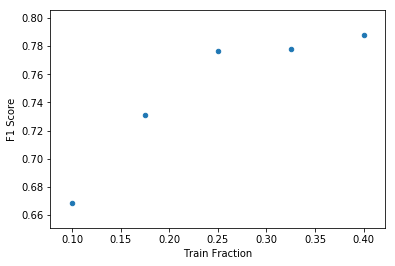

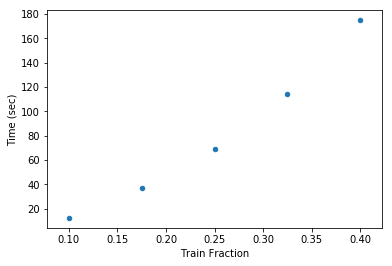

In [65]:
plt.figure()
f1df.plot.scatter("Train Fraction", "F1 Score", )
f1df.plot.scatter("Train Fraction", "Time (sec)")
plt.show()

Using 10-20% of observations in training seems reasonable for hyperparamater search and model selection

In [72]:
# Hyperparamater search
test_num = 5
size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = size)
y_train_num = (y_train == test_num)
svm_test_clf.fit(x_train, y_train_num)

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'svc__dual': [False, True], 'svc__C': [0.25, 0.5, 1, 1.5, 2]}
  ]

svm_test_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", LinearSVC())
])

grid_search = GridSearchCV(svm_test_clf, param_grid, cv=3,
                           scoring='f1', verbose = 2)

grid_search.fit(x_train, y_train_num)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] svc__C=0.25, svc__dual=False ....................................
[CV] ..................... svc__C=0.25, svc__dual=False, total=  23.0s
[CV] svc__C=0.25, svc__dual=False ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.1s remaining:    0.0s


[CV] ..................... svc__C=0.25, svc__dual=False, total=  23.3s
[CV] svc__C=0.25, svc__dual=False ....................................
[CV] ..................... svc__C=0.25, svc__dual=False, total=  25.7s
[CV] svc__C=0.25, svc__dual=True .....................................
[CV] ...................... svc__C=0.25, svc__dual=True, total=   2.8s
[CV] svc__C=0.25, svc__dual=True .....................................
[CV] ...................... svc__C=0.25, svc__dual=True, total=   2.7s
[CV] svc__C=0.25, svc__dual=True .....................................
[CV] ...................... svc__C=0.25, svc__dual=True, total=   3.2s
[CV] svc__C=0.5, svc__dual=False .....................................
[CV] ...................... svc__C=0.5, svc__dual=False, total=  22.2s
[CV] svc__C=0.5, svc__dual=False .....................................
[CV] ...................... svc__C=0.5, svc__dual=False, total=  21.9s
[CV] svc__C=0.5, svc__dual=False .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'svc__dual': [False, True], 'svc__C': [0.25, 0.5, 1, 1.5, 2]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [73]:
grid_search.best_params_

{'svc__C': 0.25, 'svc__dual': False}

In [75]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.7026658782993151 {'svc__C': 0.25, 'svc__dual': False}
0.696326233047323 {'svc__C': 0.25, 'svc__dual': True}
0.6848352570309042 {'svc__C': 0.5, 'svc__dual': False}
0.6791057257888546 {'svc__C': 0.5, 'svc__dual': True}
0.6766370344147977 {'svc__C': 1, 'svc__dual': False}
0.6692540689834581 {'svc__C': 1, 'svc__dual': True}
0.6734334419343383 {'svc__C': 1.5, 'svc__dual': False}
0.6669624823894055 {'svc__C': 1.5, 'svc__dual': True}
0.6706462414019515 {'svc__C': 2, 'svc__dual': False}
0.6668591372724001 {'svc__C': 2, 'svc__dual': True}


Best params for LinearSVC are C=0.25 and dual=False

Decide if another kernel is better



In [80]:
test_num = 5
size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = size)
y_train_num = (y_train == test_num)

kern_svc_test_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

kern_svc_test_clf.get_params().keys()

dict_keys(['memory', 'steps', 'scaler', 'svc', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [85]:
# kern_param_grid = [
#     {'svc__kernel': ('rbf', 'sigmoid'), 'svc__gamma': (0.1, 5), 'svc__C': (1,10)},
#     {'svc__kernel': ('poly'), 'svc__degree' : (2,3,5,7), 'svc__gamma': (0.1, 5), 'svc__C': (1,10)}
# ]

kern_param_grid = {'svc__kernel': ('rbf', 'sigmoid'), 'svc__gamma': (0.1, 5), 'svc__C': (1,10)}

kern_grid_search = GridSearchCV(kern_svc_test_clf, kern_param_grid, cv=3,
                           scoring='f1', verbose = 2)

kern_grid_search.fit(x_train, y_train_num)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] svc__C=1, svc__gamma=0.1, svc__kernel=rbf .......................
[CV] ........ svc__C=1, svc__gamma=0.1, svc__kernel=rbf, total=  49.1s
[CV] svc__C=1, svc__gamma=0.1, svc__kernel=rbf .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ........ svc__C=1, svc__gamma=0.1, svc__kernel=rbf, total=  46.6s
[CV] svc__C=1, svc__gamma=0.1, svc__kernel=rbf .......................
[CV] ........ svc__C=1, svc__gamma=0.1, svc__kernel=rbf, total=  55.4s
[CV] svc__C=1, svc__gamma=0.1, svc__kernel=sigmoid ...................
[CV] .... svc__C=1, svc__gamma=0.1, svc__kernel=sigmoid, total=   8.8s
[CV] svc__C=1, svc__gamma=0.1, svc__kernel=sigmoid ...................
[CV] .... svc__C=1, svc__gamma=0.1, svc__kernel=sigmoid, total=   8.5s
[CV] svc__C=1, svc__gamma=0.1, svc__kernel=sigmoid ...................
[CV] .... svc__C=1, svc__gamma=0.1, svc__kernel=sigmoid, total=   8.3s
[CV] svc__C=1, svc__gamma=5, svc__kernel=rbf .........................
[CV] .......... svc__C=1, svc__gamma=5, svc__kernel=rbf, total=  48.6s
[CV] svc__C=1, svc__gamma=5, svc__kernel=rbf .........................
[CV] .......... svc__C=1, svc__gamma=5, svc__kernel=rbf, total=  49.1s
[CV] svc__C=1, svc__gamma=5, svc__kernel=rbf .........................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 20.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__kernel': ('rbf', 'sigmoid'), 'svc__gamma': (0.1, 5), 'svc__C': (1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [105]:

poly_param_grid = {'svc__degree' : (2,3,5,7), 'svc__gamma': (0.1, 5), 'svc__C': (1,10)}
poly_svc_test_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = "poly"))
])
poly_grid_search = GridSearchCV(poly_svc_test_clf, poly_param_grid, cv=3,
                           scoring='f1', verbose = 2)

poly_grid_search.fit(x_train, y_train_num)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] svc__C=1, svc__degree=2, svc__gamma=0.1 .........................
[CV] .......... svc__C=1, svc__degree=2, svc__gamma=0.1, total=   7.1s
[CV] svc__C=1, svc__degree=2, svc__gamma=0.1 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.4s remaining:    0.0s


[CV] .......... svc__C=1, svc__degree=2, svc__gamma=0.1, total=   7.3s
[CV] svc__C=1, svc__degree=2, svc__gamma=0.1 .........................
[CV] .......... svc__C=1, svc__degree=2, svc__gamma=0.1, total=   7.2s
[CV] svc__C=1, svc__degree=2, svc__gamma=5 ...........................
[CV] ............ svc__C=1, svc__degree=2, svc__gamma=5, total=   7.1s
[CV] svc__C=1, svc__degree=2, svc__gamma=5 ...........................
[CV] ............ svc__C=1, svc__degree=2, svc__gamma=5, total=   7.5s
[CV] svc__C=1, svc__degree=2, svc__gamma=5 ...........................
[CV] ............ svc__C=1, svc__degree=2, svc__gamma=5, total=   7.2s
[CV] svc__C=1, svc__degree=3, svc__gamma=0.1 .........................
[CV] .......... svc__C=1, svc__degree=3, svc__gamma=0.1, total=  13.4s
[CV] svc__C=1, svc__degree=3, svc__gamma=0.1 .........................
[CV] .......... svc__C=1, svc__degree=3, svc__gamma=0.1, total=  14.3s
[CV] svc__C=1, svc__degree=3, svc__gamma=0.1 .........................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 31.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__degree': (2, 3, 5, 7), 'svc__gamma': (0.1, 5), 'svc__C': (1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [108]:
kern_grid_search.cv_results_

{'mean_fit_time': array([34.15113521,  6.65236863, 32.61934972,  7.13492409, 41.9461236 ,
         6.79775127, 33.430276  ,  5.73142354]),
 'std_fit_time': array([2.7920692 , 0.21623449, 0.59865881, 0.67368405, 0.43134485,
        0.34902047, 0.55234095, 0.41152081]),
 'mean_score_time': array([16.2142179 ,  1.87304513, 17.53865941,  2.32512228, 18.85055208,
         1.91795739, 16.39000805,  1.72684518]),
 'std_score_time': array([0.88753624, 0.0567176 , 1.31483636, 0.12802356, 0.4455613 ,
        0.10417814, 0.50583623, 0.05045239]),
 'param_svc__C': masked_array(data=[1, 1, 1, 1, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_svc__gamma': masked_array(data=[0.1, 0.1, 5, 5, 0.1, 0.1, 5, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_svc__kernel': masked_array(data=['rbf', 'sigmoid', 'rb

In [109]:
kern_grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [110]:
linear_grid_search = grid_search

In [112]:
print("Linear SVC")
cvres = linear_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
print("RBF/Gamma SVC")
cvres = kern_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)
print("Polynomial SVC")
cvres = poly_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Linear SVC
0.7026658782993151 {'svc__C': 0.25, 'svc__dual': False}
0.696326233047323 {'svc__C': 0.25, 'svc__dual': True}
0.6848352570309042 {'svc__C': 0.5, 'svc__dual': False}
0.6791057257888546 {'svc__C': 0.5, 'svc__dual': True}
0.6766370344147977 {'svc__C': 1, 'svc__dual': False}
0.6692540689834581 {'svc__C': 1, 'svc__dual': True}
0.6734334419343383 {'svc__C': 1.5, 'svc__dual': False}
0.6669624823894055 {'svc__C': 1.5, 'svc__dual': True}
0.6706462414019515 {'svc__C': 2, 'svc__dual': False}
0.6668591372724001 {'svc__C': 2, 'svc__dual': True}
RBF/Gamma SVC
0.0 {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.06133625 {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}
0.0 {'svc__C': 1, 'svc__gamma': 5, 'svc__kernel': 'rbf'}
0.07318575429906879 {'svc__C': 1, 'svc__gamma': 5, 'svc__kernel': 'sigmoid'}
0.0 {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.06420475920373822 {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'sigmoid'}
0.0 {'svc__C': 10, 'svc__gamma': 5

Best classifier appears to be an SVC with a 2-degree polynomial kernel. Will proceed with that

In [114]:
# Try as a multi-class classification problem

train_split_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = train_split_size)

poly2_svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = "poly", degree = 2, verbose = 2))
])

poly2_svc_clf.fit(x_train, y_train)

[LibSVM]

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=2))])

In [115]:
p2_cv_score = cross_val_score(poly2_svc_clf, x_train, y_train, cv = 3)

[LibSVM][LibSVM][LibSVM]

In [119]:
print(p2_cv_score)
p2_cv_score.mean()

[0.92936644 0.90955851 0.92277992]


0.9205682898314748

2-degree polynomial SVC classifier seems to do fairly well (F1 score = 0.92)

Re-train with a more reasonable-sized training set

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

train_split_size = 0.1
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = train_split_size)
poly2_svc_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel = "poly", degree = 2, verbose = 2))
])
p2_cv_scores = cross_val_predict(poly2_svc_clf, x_train, y_train, method = "decision_function")

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[LibSVM]

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[LibSVM]

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[LibSVM]

In [12]:
p2_cv_predict = cross_val_predict(poly2_svc_clf, x_train, y_train)

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[LibSVM]

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[LibSVM]

/Users/mike/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[LibSVM]

In [19]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_train, p2_cv_predict)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,634,5,3,0,1,1,6,1,37,2
1,0,769,5,0,3,0,2,1,6,1
2,2,4,617,8,10,2,4,7,38,8
3,0,3,3,671,2,6,2,4,26,4
4,3,6,5,2,652,0,3,2,7,22
5,1,2,3,11,6,515,8,0,23,17
6,4,2,2,1,5,13,644,1,23,0
7,3,10,2,4,17,0,0,638,5,49
8,1,15,3,7,4,14,0,2,626,7
9,1,6,2,9,24,2,0,14,15,639


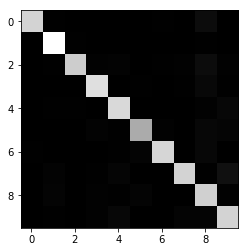

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cm, cmap=plt.cm.gray)
plt.show()

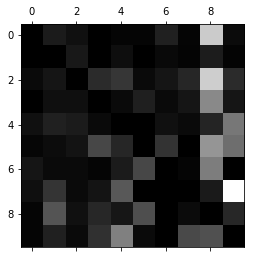

In [25]:
import numpy as np

row_sums = cm.sum(axis = 1, keepdims = True)
norm_cm = cm / row_sums
np.fill_diagonal(norm_cm, 0)
plt.matshow(norm_cm, cmap = plt.cm.gray)
plt.show()